# Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

## Some relevant columns in the dataset:
1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold

# Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price.

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 


## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, median_absolute_error, max_error,accuracy_score, mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Import data

## Task-  Regression (to find the region and find the average price)

In [2]:
df=pd.read_csv("C:/Users/KHUSHBOO RANI/OneDrive/Desktop/Projects/ML project/avocado.csv")
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10350,28,2015-06-14,1.58,2093.17,17.42,1174.85,0.00,900.90,415.53,485.37,0.00,organic,2015,Louisville
6136,43,2017-03-05,0.78,272988.49,2739.88,82627.36,1107.95,186513.30,20142.93,166331.26,39.11,conventional,2017,CincinnatiDayton
7225,19,2017-08-20,1.82,322962.89,5632.85,242365.82,2441.56,72522.66,22942.48,46083.51,3496.67,conventional,2017,NorthernNewEngland
15367,43,2017-03-05,1.04,26417.40,8206.79,345.90,0.00,17864.71,17695.65,169.06,0.00,organic,2017,DallasFtWorth
13076,51,2016-01-03,1.69,7552.52,1709.77,3384.63,0.00,2458.12,2435.48,22.64,0.00,organic,2016,LasVegas


In [3]:
#remove unnamed column
df=df.iloc[:,1:]

In [4]:
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [5]:
df.sample(15)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
4690,2016-10-16,1.16,563725.30,106966.73,107928.08,13597.96,335232.53,329875.17,5211.82,145.54,conventional,2016,Portland
16901,2017-03-26,2.44,6509.21,2084.95,3599.70,0.00,824.56,824.56,0.00,0.00,organic,2017,Sacramento
14495,2016-09-18,1.51,1953.97,8.88,69.60,0.00,1875.49,1875.49,0.00,0.00,organic,2016,Syracuse
6891,2017-12-10,1.03,713866.00,484033.33,71985.61,6988.61,150858.45,75190.47,75667.98,0.00,conventional,2017,MiamiFtLauderdale
3203,2016-05-22,1.26,203492.89,37008.26,95769.19,20859.76,49855.68,45579.73,3940.95,335.00,conventional,2016,Charlotte
10573,2015-03-01,1.54,2478.78,300.00,35.45,0.00,2143.33,2140.00,3.33,0.00,organic,2015,NewOrleansMobile
12460,2016-11-06,0.89,16601.25,537.42,2897.13,0.00,13166.70,2262.47,10904.23,0.00,organic,2016,Columbus
15785,2017-04-16,1.35,6451.24,226.81,1575.87,0.00,4648.56,1685.00,2963.56,0.00,organic,2017,Indianapolis
13457,2016-09-04,1.92,128284.46,8635.35,30659.29,537.03,88452.79,87987.89,464.90,0.00,organic,2016,Northeast
11535,2015-08-30,1.74,33530.11,9183.16,8692.14,802.48,14852.33,12185.97,2666.36,0.00,organic,2015,Southeast


In [6]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# Exploratory Data Analysis

In [7]:
df.shape

(18249, 13)

##### Dataset have 18249 rows and 13 columns

In [8]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

##### These are the columns name--
'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'

In [9]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [12]:
# Now Seperate date and month
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df.drop("Date",axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


#### Checking for null vales

In [13]:
print("Total Missing values in dataset:- ", df.isnull().sum().sum())
print('\n')
print(df.isnull().sum())


Total Missing values in dataset:-  0


AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64


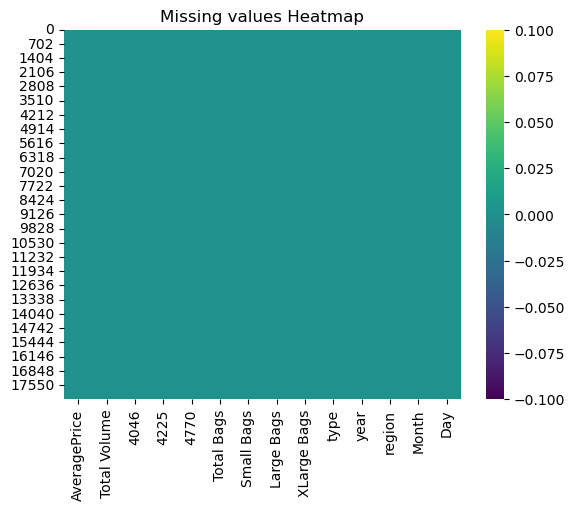

In [14]:
#visualize missing values usning heatmap
sns.heatmap(df.isnull(), cmap="viridis")
plt.title("Missing values Heatmap")
plt.show()

###### There is no any Missing value in dataset

In [15]:
#Chhecking unique vales of the columns
df.nunique().to_frame("No. of Unique values")


,No. of Unique values
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588
type,2


In [16]:
#checking unique values in region column
df['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int32  
 13  Day           18249 non-null  int32  
dtypes: float64(9), int32(2), int64(1), object(2)
memory usage: 1.8+ MB


In [18]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


Here we observe mean values and median median is greater than the mean so it is left side skew data is present Here we observe 75 percentile and maximum large difference is there

In [19]:
# checking duplicate values
duplicate_rows = df[df.duplicated(keep=False)]

print(duplicate_rows)

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Month, Day]
Index: []


There is no any duplicate rows

## Checking Outliers  

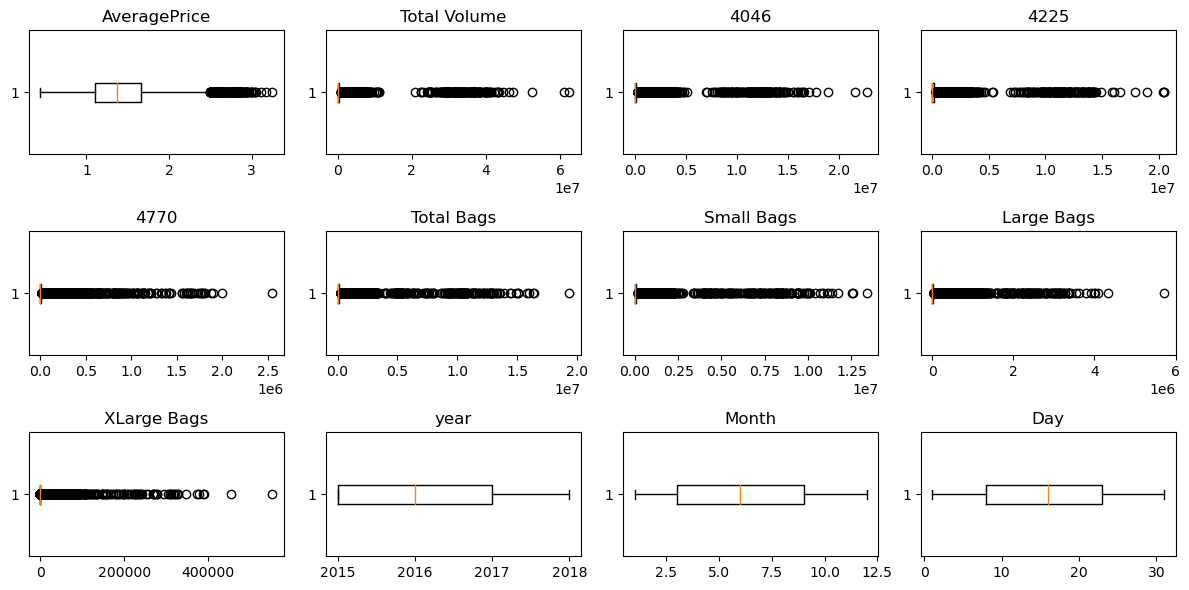

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

numerical_columns = df.select_dtypes(exclude='object').columns

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(df[column], vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()


#### Above box plot reflects that there are outliers present in all the columns except Year,Month,Day.

We will have to remove the outliers using z-score method.

Even AveragePrice has outliers, as its our target variable we will not remove outliers from it.

### Outlier removal using z-score

In [21]:
# Features containing outliers
feature_cols = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [22]:
df1 = df[(z<3).all(axis=1)] 
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [23]:
print('Before removing outliers =',df.shape)
print('After removing outliers =',df1.shape)
print('Percentage data loss =',((18249-17782)/18249*100))

Before removing outliers = (18249, 14)
After removing outliers = (17782, 14)
Percentage data loss = 2.55904433119623


In [24]:
df1=df

# Data Visualization

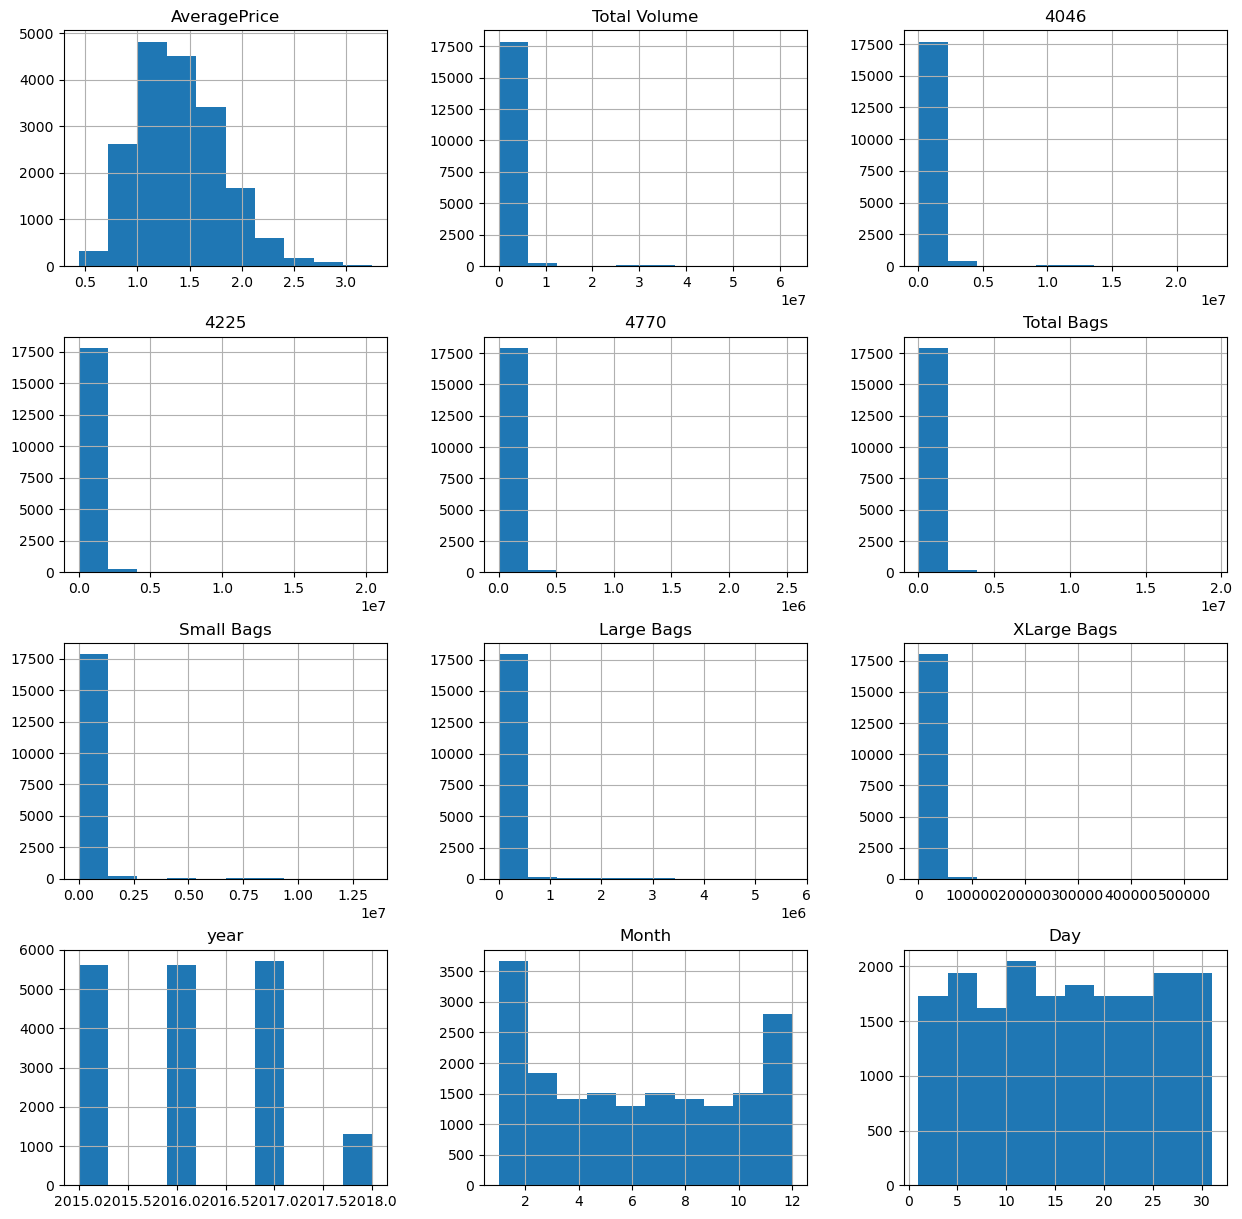

In [25]:
df.hist(figsize=(15,15))
plt.show()

## Univariate Analysis

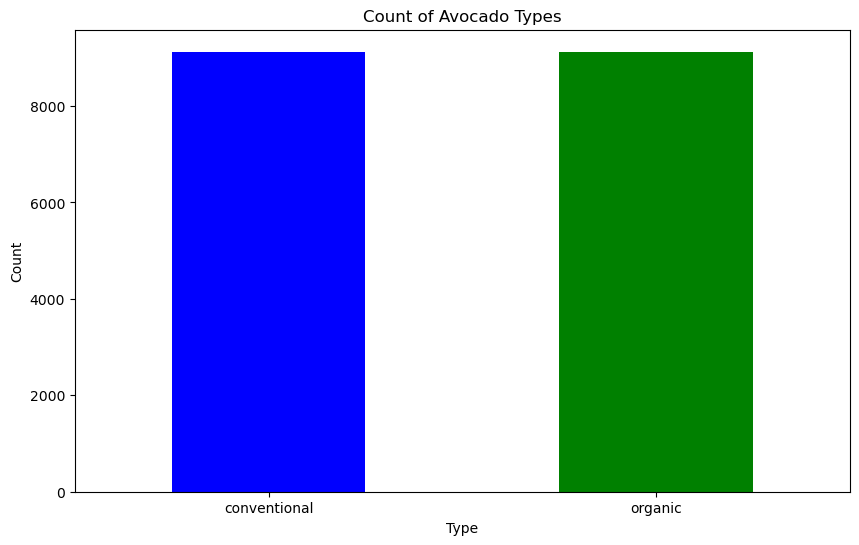

In [26]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Avocado Types')
plt.xticks(rotation=0) 
plt.show()

As per above observation, We can see that conventional and organic data is mostly similar.

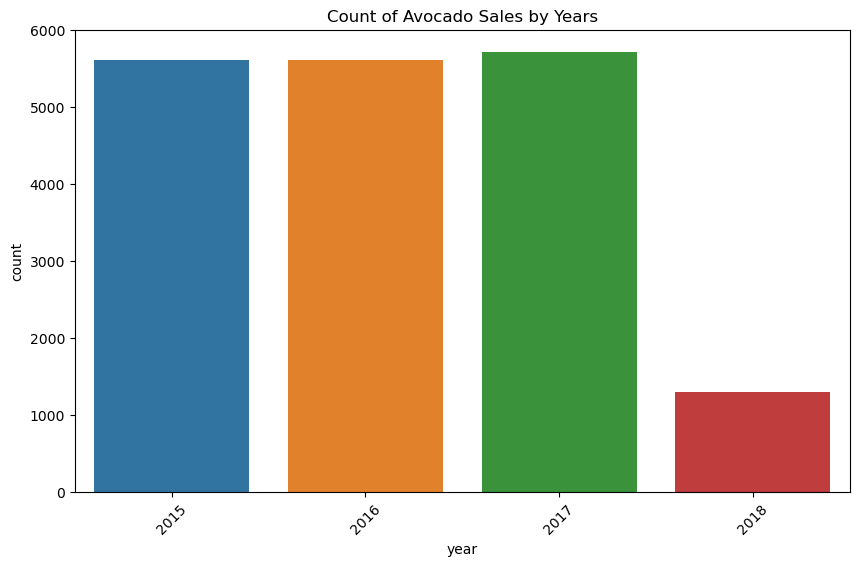

In [27]:
year_counts = df['year'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year')
plt.title('Count of Avocado Sales by Years')
plt.xticks(rotation=45)
plt.show()

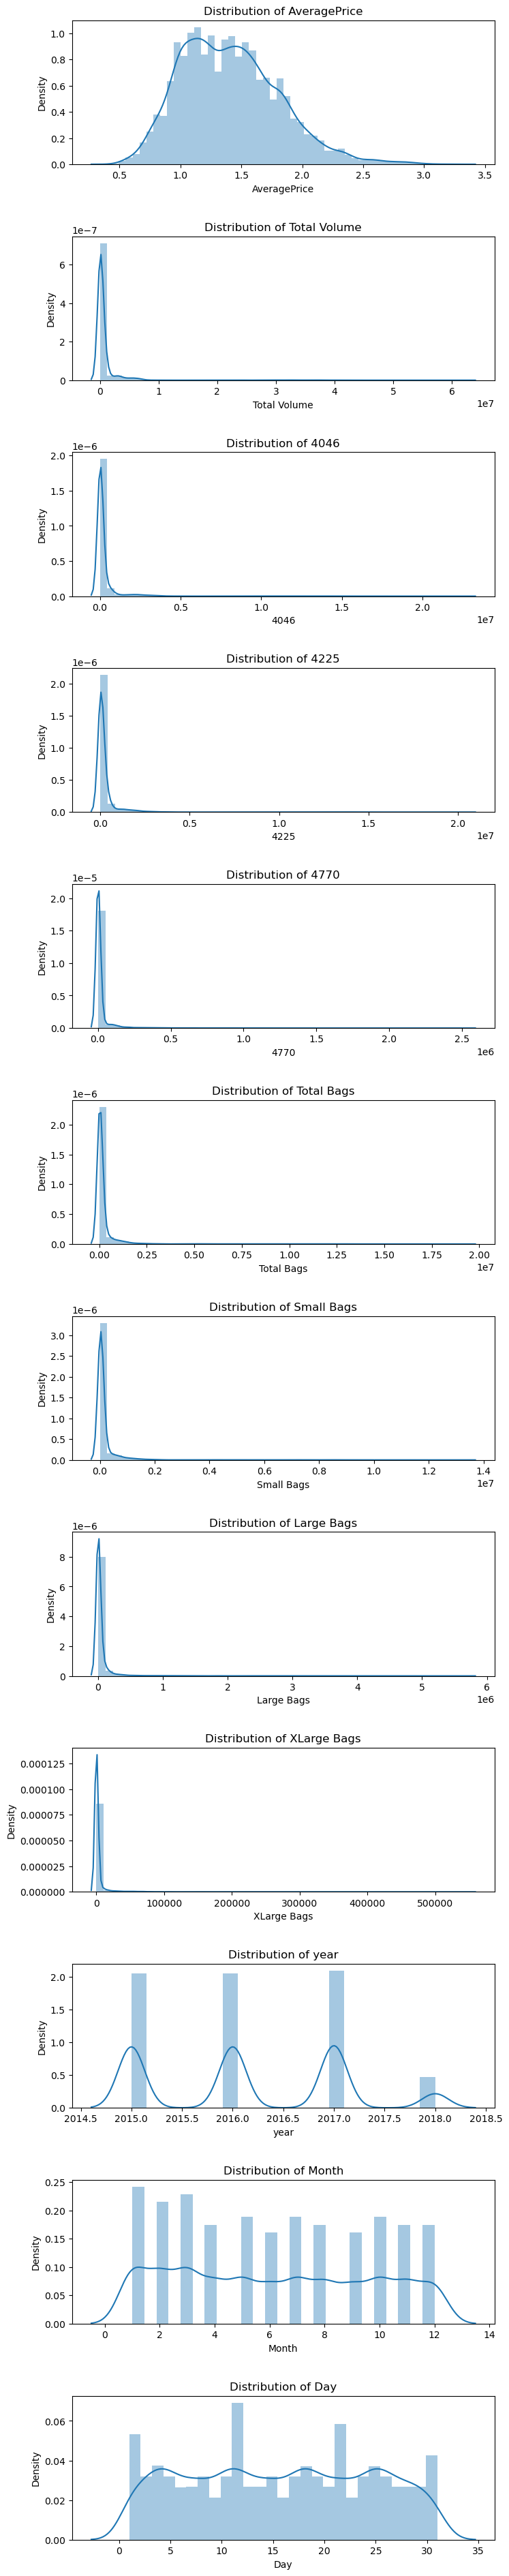

In [28]:
numeric_columns = df.select_dtypes(include=[float, int]).columns

num_plots = len(numeric_columns)

fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numeric_columns):
    sns.distplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

plt.show()


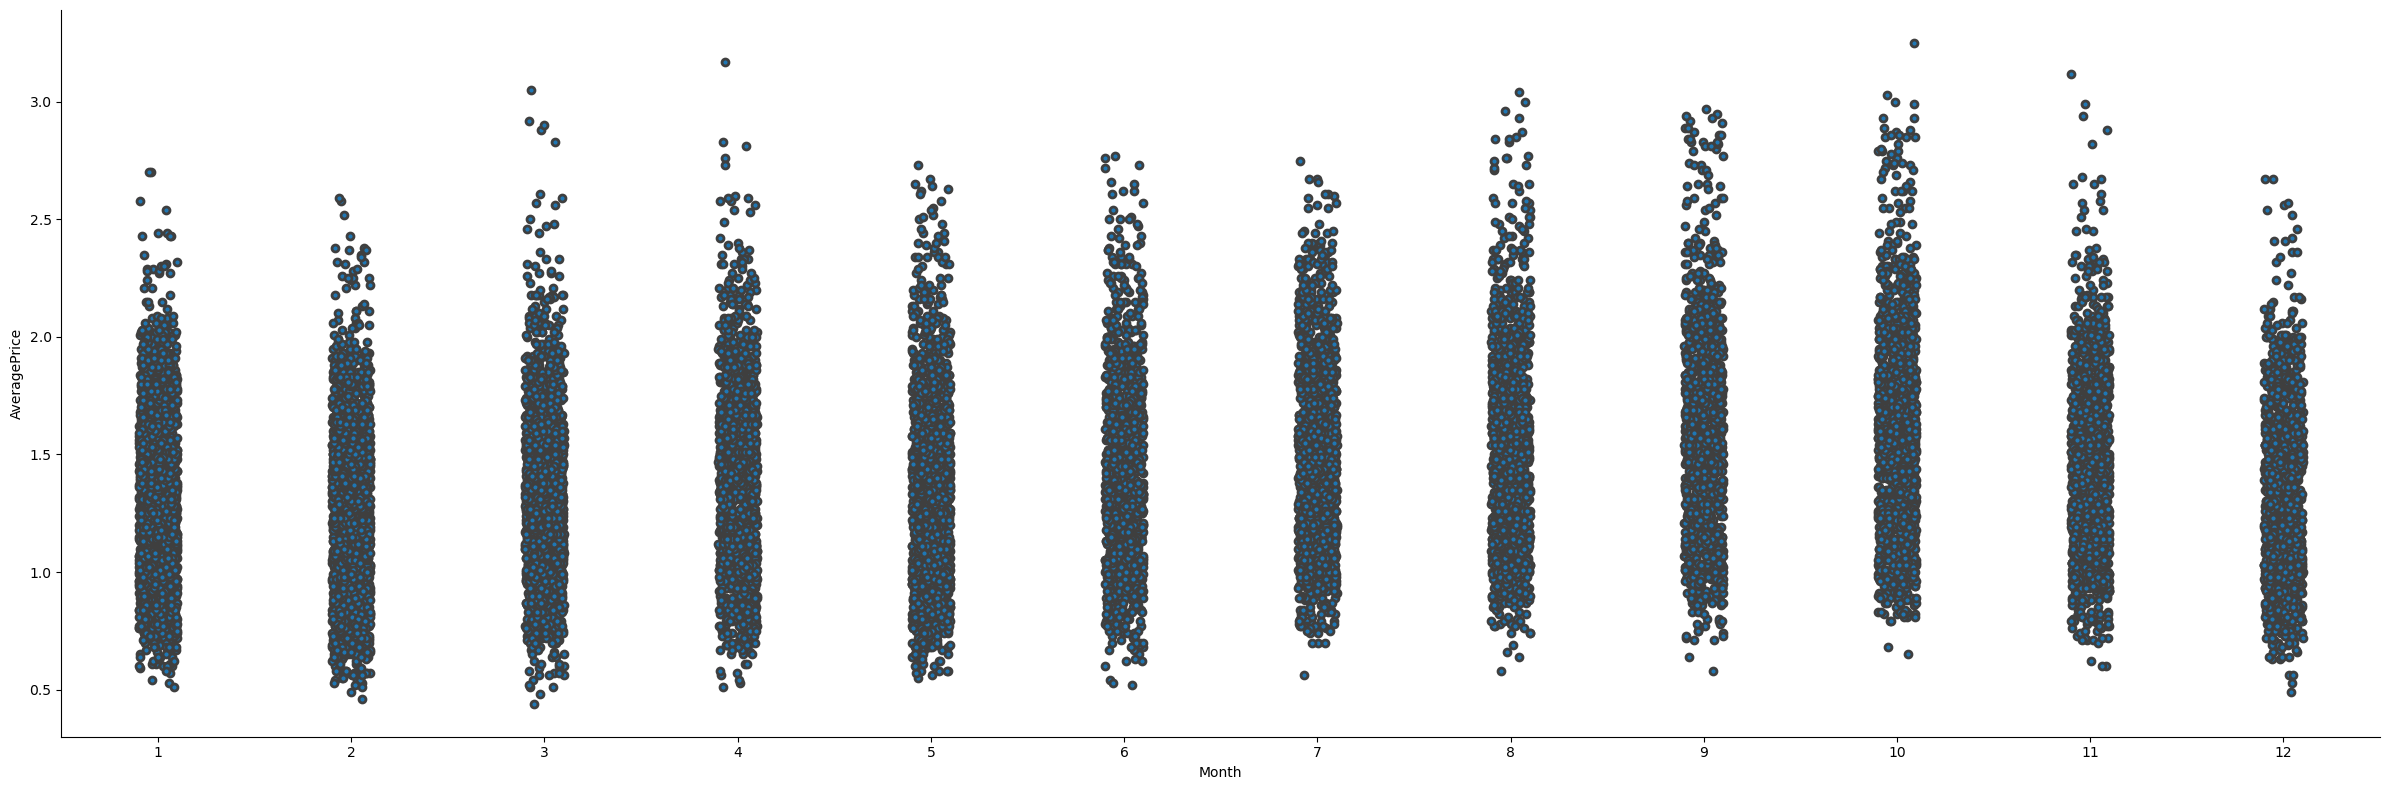

In [29]:
# Relationship between Average Price and Month
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=3)
plt.show()

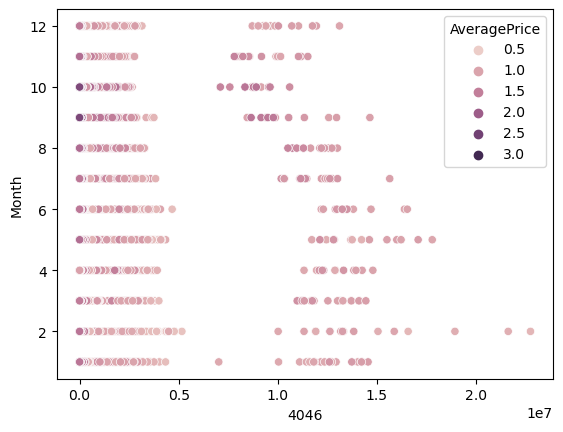

In [30]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4046", y = "Month",hue='AveragePrice',data=df)
plt.show()

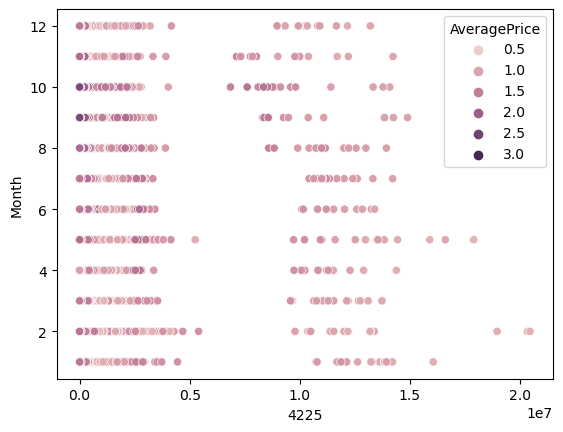

In [31]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4225", y = "Month",hue='AveragePrice',data=df)
plt.show()

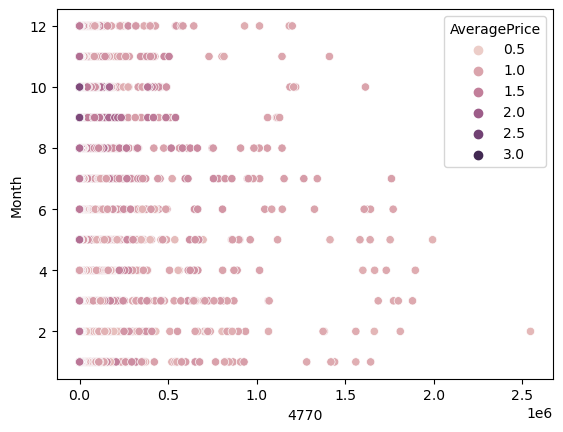

In [32]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4770", y = "Month",hue='AveragePrice',data=df)
plt.show()

## Data Visualization using Bar Plot

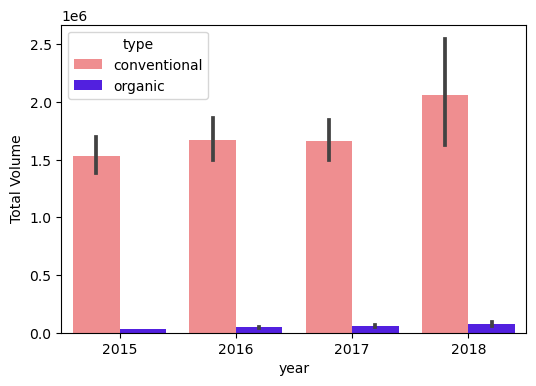

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="gnuplot2_r")
plt.show()

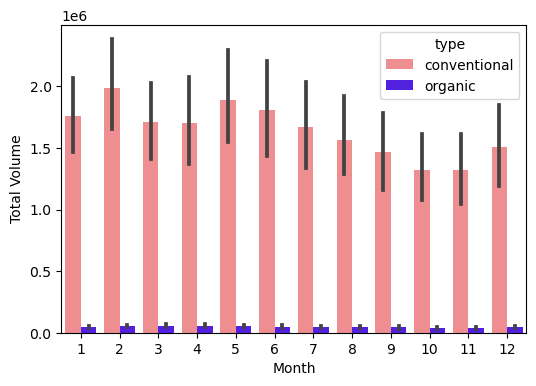

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x='Month',y='Total Volume',hue="type",data=df,palette="gnuplot2_r")
plt.show()

Organic avocados are more expensive.

Let's look at the price of avocado in different regions in different years. Let's start with organic avocados.

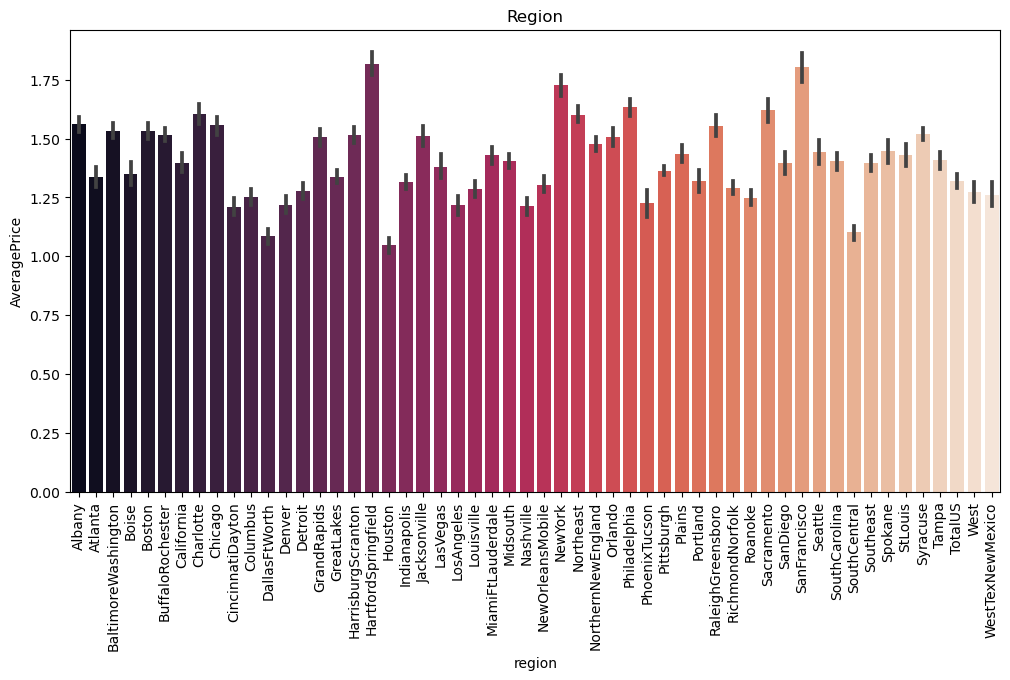

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='AveragePrice', data=df, palette='rocket')
plt.title('Region')
plt.xticks(rotation=90)
plt.show()


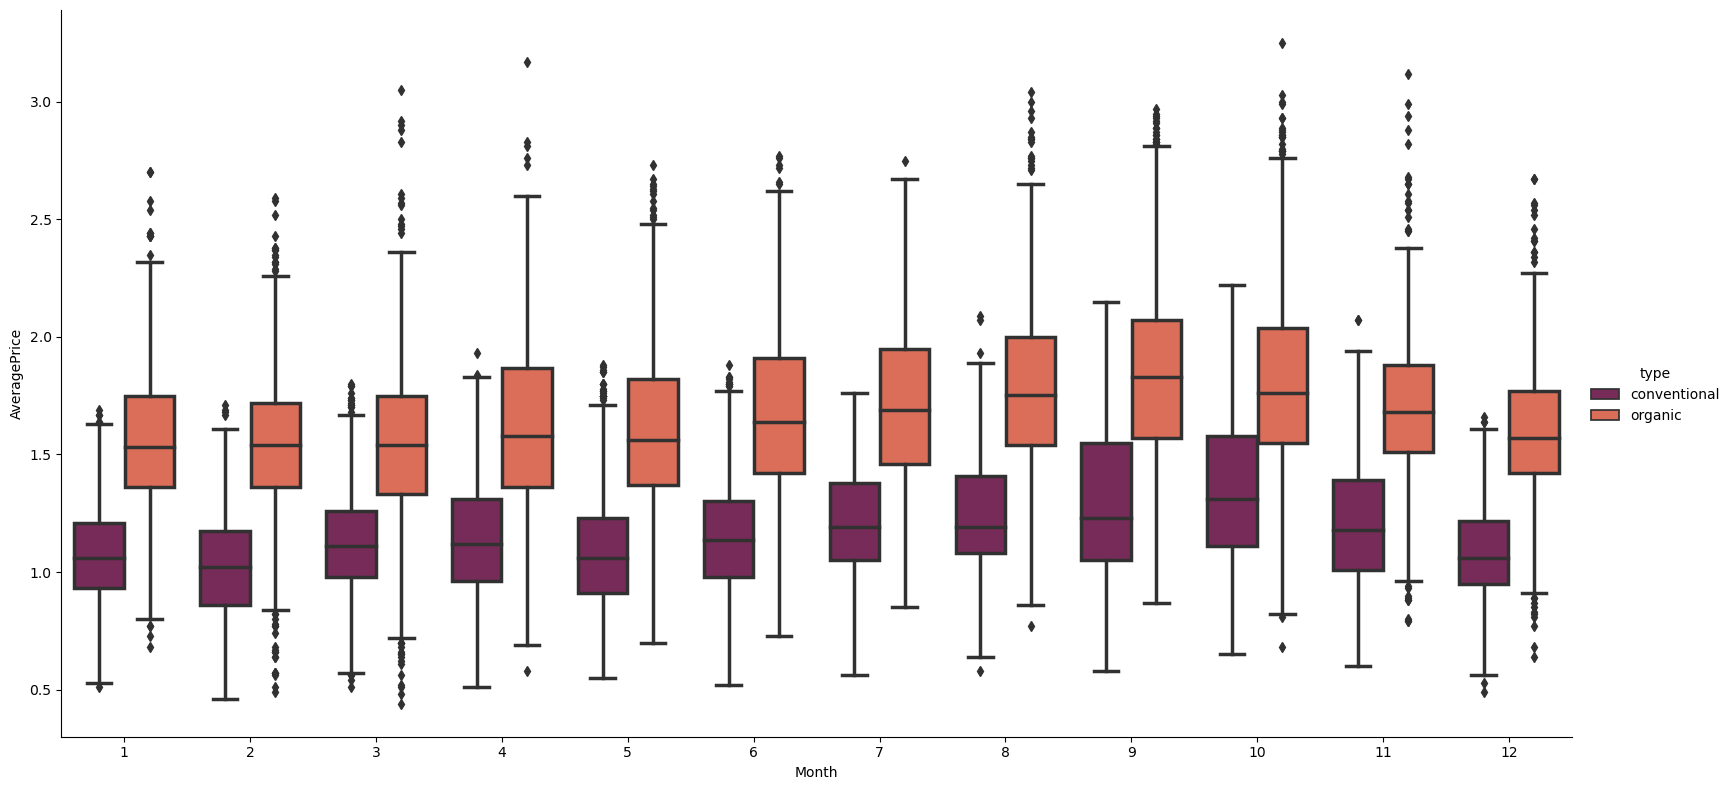

In [36]:
#Relation between month and Average PRice
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8, linewidth=2.5, aspect=2,palette="rocket");


We can observe that the price of the Organic type avacoda is high compared to coventional, eariler we observed that the demand for conventional is high, it may be because of less price and easy avability

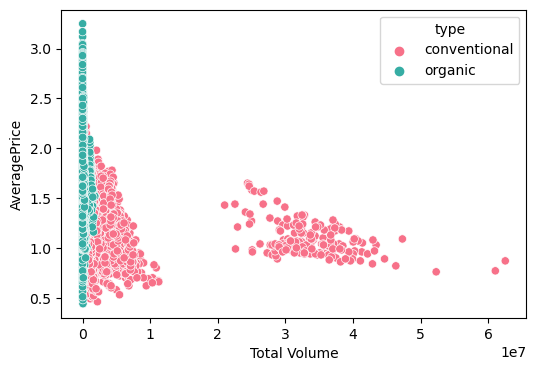

In [37]:
#Relationship between Total volume and Average Price:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="husl")
plt.show()

All organic type of avocado is lies in the volume zero and the average price is high for organic. The conventional type avocado has total volume 0-4 with the Average price upto 2.3. Because of low price of conventional the higher volumns were purchase were conventional.

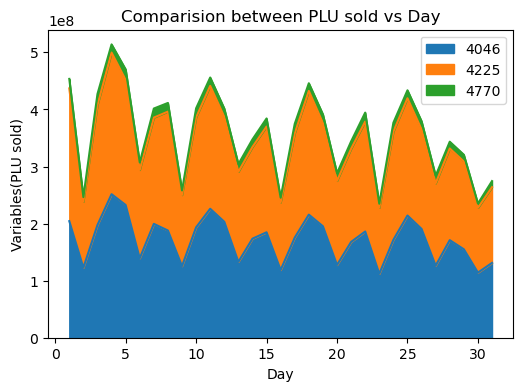

In [38]:
# Comparison between PLU sold vs day:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

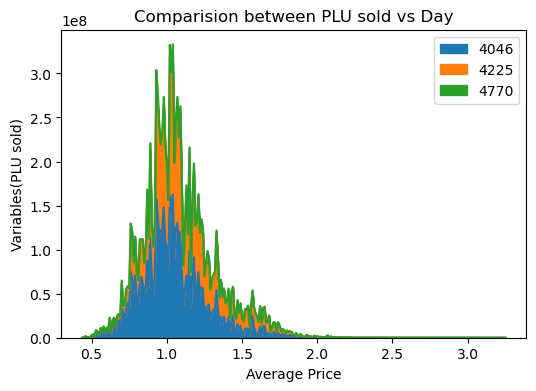

In [39]:
# Type of PLU sold and Average Price
variables = df[['4046', '4225', '4770']].groupby(df.AveragePrice).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Average Price")
plt.ylabel("Variables(PLU sold)")
plt.show()

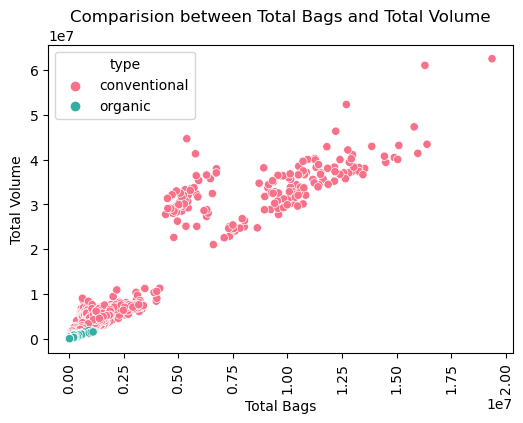

In [40]:
#Comparison between the Total Bags and Total Volume:
plt.figure(figsize=(6,4))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="type",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

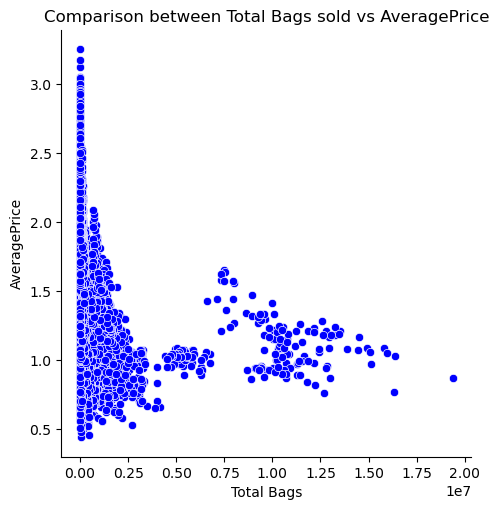

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='Total Bags', y='AveragePrice', data=df, color='b')
plt.title('Comparison between Total Bags sold vs AveragePrice')
plt.xlabel('Total Bags')
plt.ylabel('AveragePrice')
plt.show()


Continuous columns have skewness.

Spike in average price in the year 2017 as the demand was little high in SanFranciso region.
Price is very high in HartfordSpringfield Region.

Consumption is very high in West region.

If we think back to the box plot, we can see that Organic cost roughly 34% more than Conventional.

When looking over their average volume sold, we see that in 2019 Organic Avocados roughly sold 72,000-units, Conventional Avocados sold around 2,000,000-units. Taking these two averages, Organic Avocados sold roughly 186% more than Conventional.

After cleaning, compiling, and organizing the relevant datasets we can see that Organic Avocados are consistently more expensive than Conventional Avocados. Conversely, we see that Conventional Avocados have a higher average volume sold than Organic.These results pose an inverse relationship between cost and units sold ultimately suggesting that the lower cost leads to higher sales

## Checking and removing Skewness

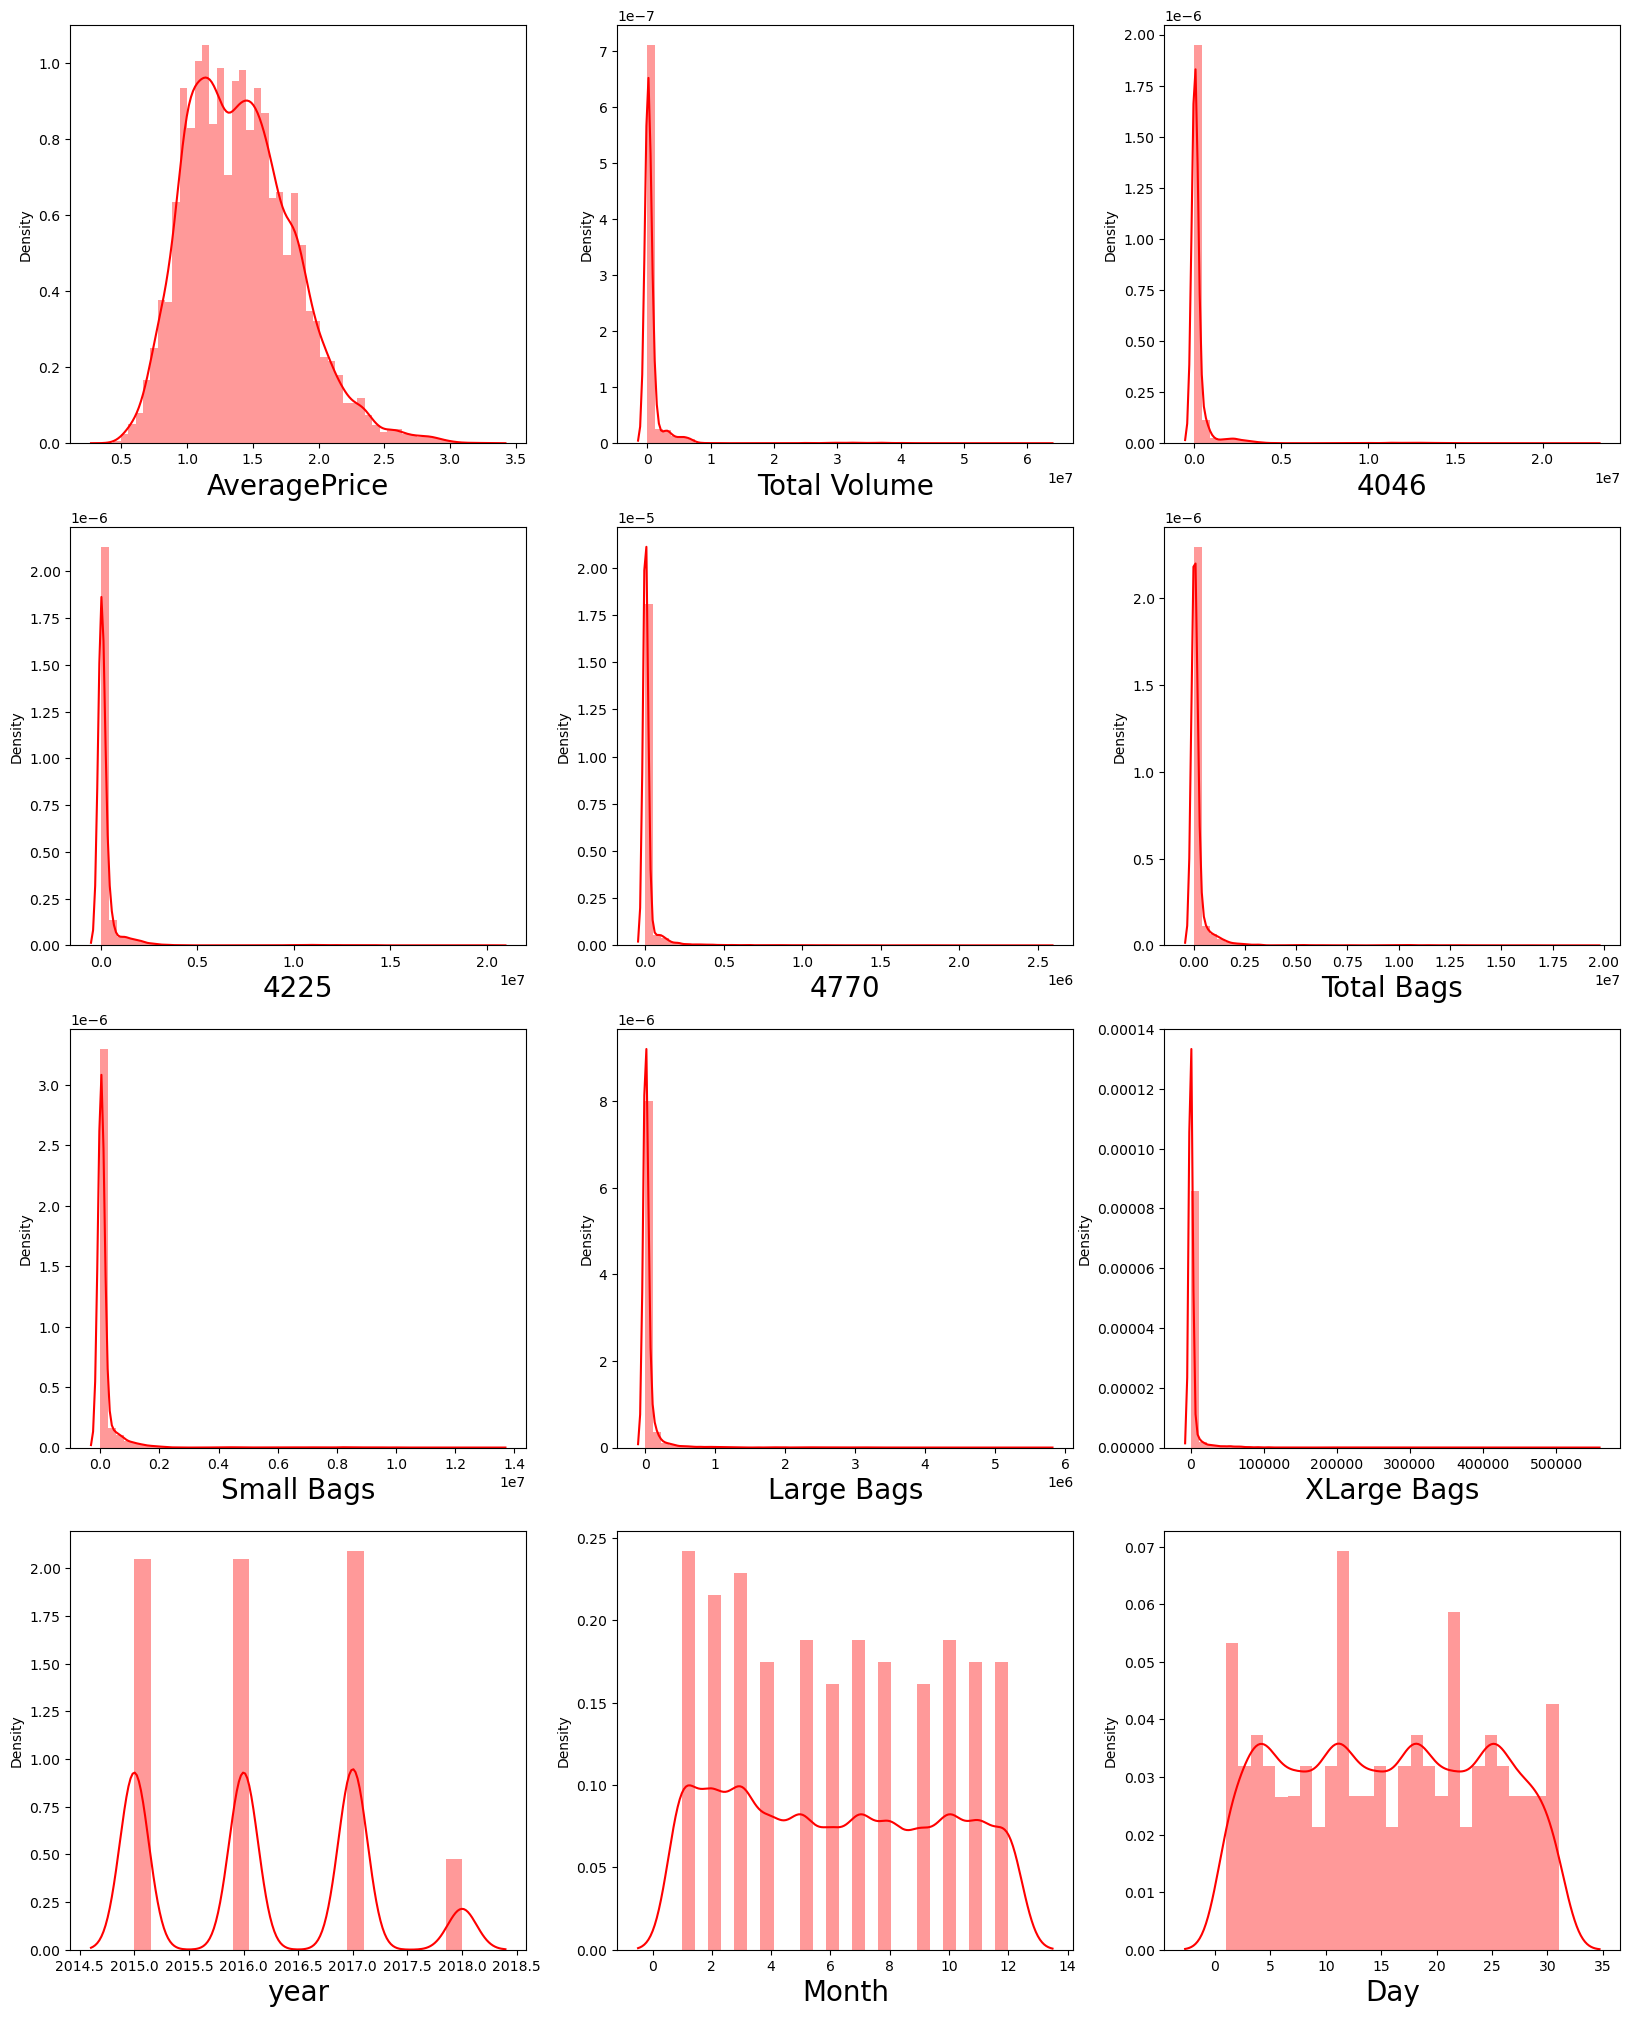

In [42]:
# Checking how the data has been distriubted in each column
numeric_columns = df.select_dtypes(include=[float, int]).columns
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_columns:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can notice skewness in almost all columns except year, month and Day

In [43]:
numeric_columns = df.select_dtypes(include=[float, int])
skewness = numeric_columns.skew()
print(skewness)


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64


In [44]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')
df[features] = sk.fit_transform(df[features].values)
df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849


In [45]:
numeric_columns = df.select_dtypes(include=[float, int])
skewness = numeric_columns.skew()
print(skewness)

AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64


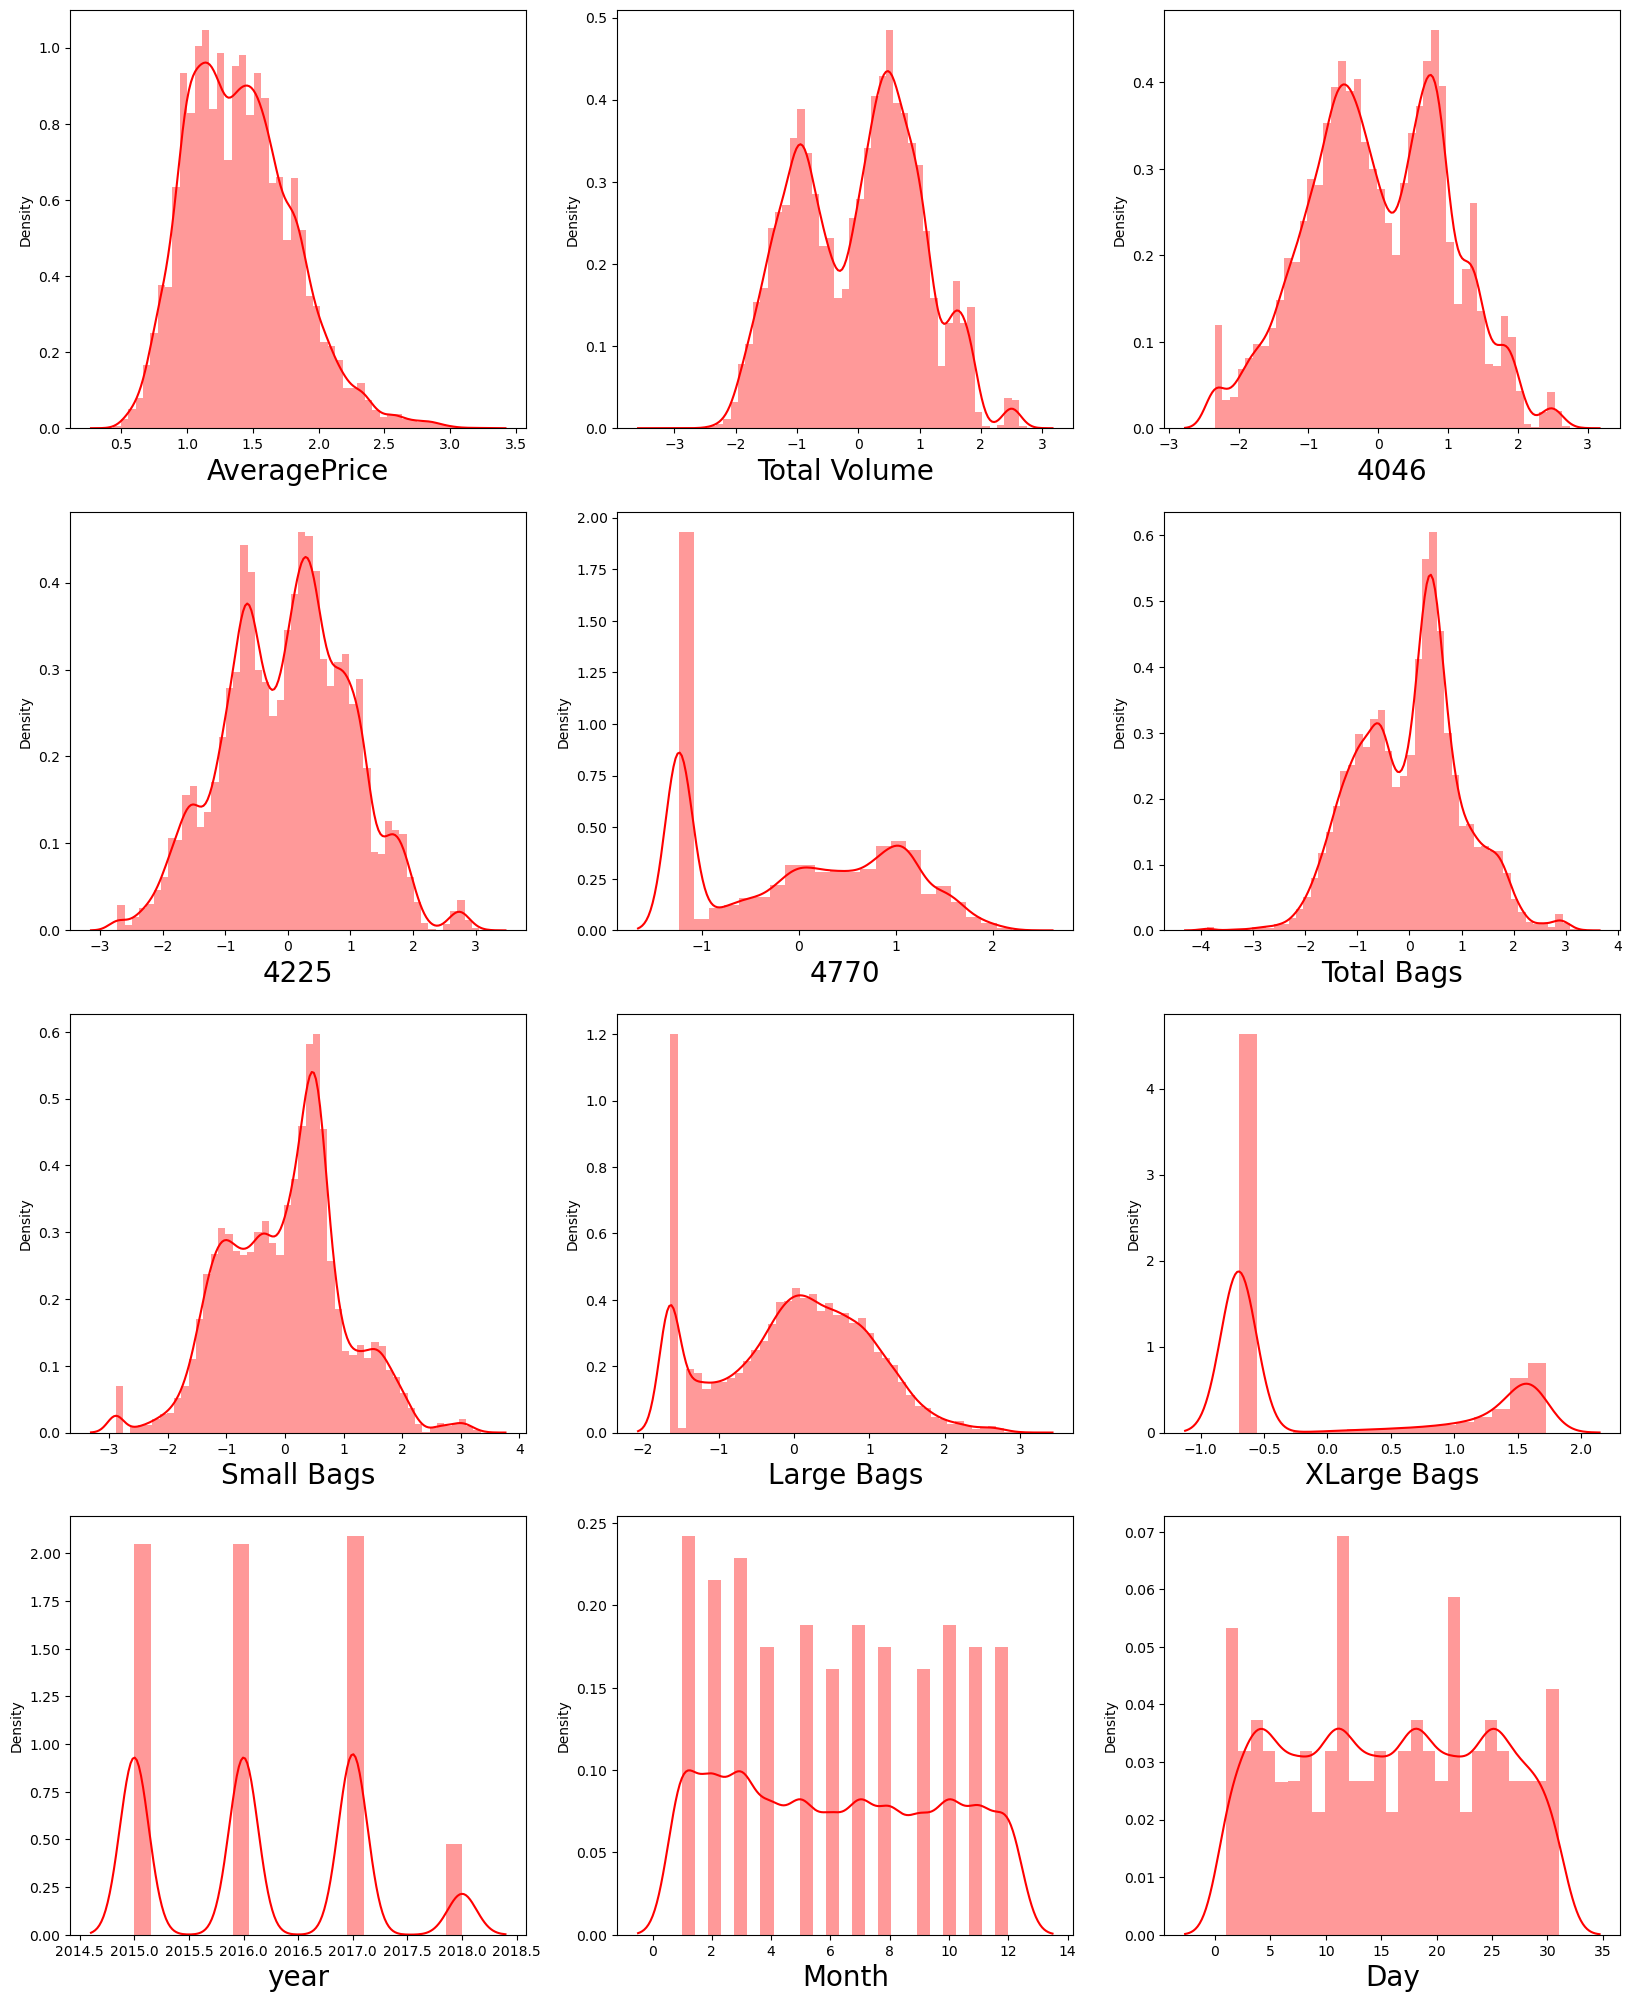

In [46]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_columns:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

so above graph shows that there is skewness in Xlarge column . we will try to remove it using log1 method.

## Encoding

In [47]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)
df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


In [48]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.584306,-0.554965,-0.460386,-0.505540,-0.572236,-0.502289,-0.489624,-0.405169,0.615845,0.093197,-0.011716,0.162409,0.027386
Total Volume,-0.584306,1.000000,0.897379,0.927606,0.831148,0.940552,0.906145,0.706269,0.654958,-0.798179,0.088540,0.109462,-0.033933,-0.010315
4046,-0.554965,0.897379,1.000000,0.786025,0.756059,0.811043,0.791672,0.632600,0.603989,-0.726710,0.011944,0.196918,-0.033851,-0.008166
4225,-0.460386,0.927606,0.786025,1.000000,0.810136,0.826776,0.793284,0.650405,0.612979,-0.744364,0.009653,0.080366,-0.031958,-0.010108
4770,-0.505540,0.831148,0.756059,0.810136,1.000000,0.777302,0.769368,0.582207,0.643383,-0.784707,-0.038700,0.073381,-0.024768,-0.002484
Total Bags,-0.572236,0.940552,0.811043,0.826776,0.777302,1.000000,0.950131,0.749597,0.638134,-0.723637,0.216796,0.112620,-0.023537,-0.008571
Small Bags,-0.502289,0.906145,0.791672,0.793284,0.769368,0.950131,1.000000,0.599769,0.627896,-0.716759,0.192220,0.098960,-0.019596,-0.005625
Large Bags,-0.489624,0.706269,0.632600,0.650405,0.582207,0.749597,0.599769,1.000000,0.491946,-0.514393,0.192075,0.133660,-0.023826,-0.004950
XLarge Bags,-0.405169,0.654958,0.603989,0.612979,0.643383,0.638134,0.627896,0.491946,1.000000,-0.673954,0.164907,0.014411,0.009623,0.005873
type,0.615845,-0.798179,-0.726710,-0.744364,-0.784707,-0.723637,-0.716759,-0.514393,-0.673954,1.000000,-0.000032,-0.000280,-0.000085,-0.000013


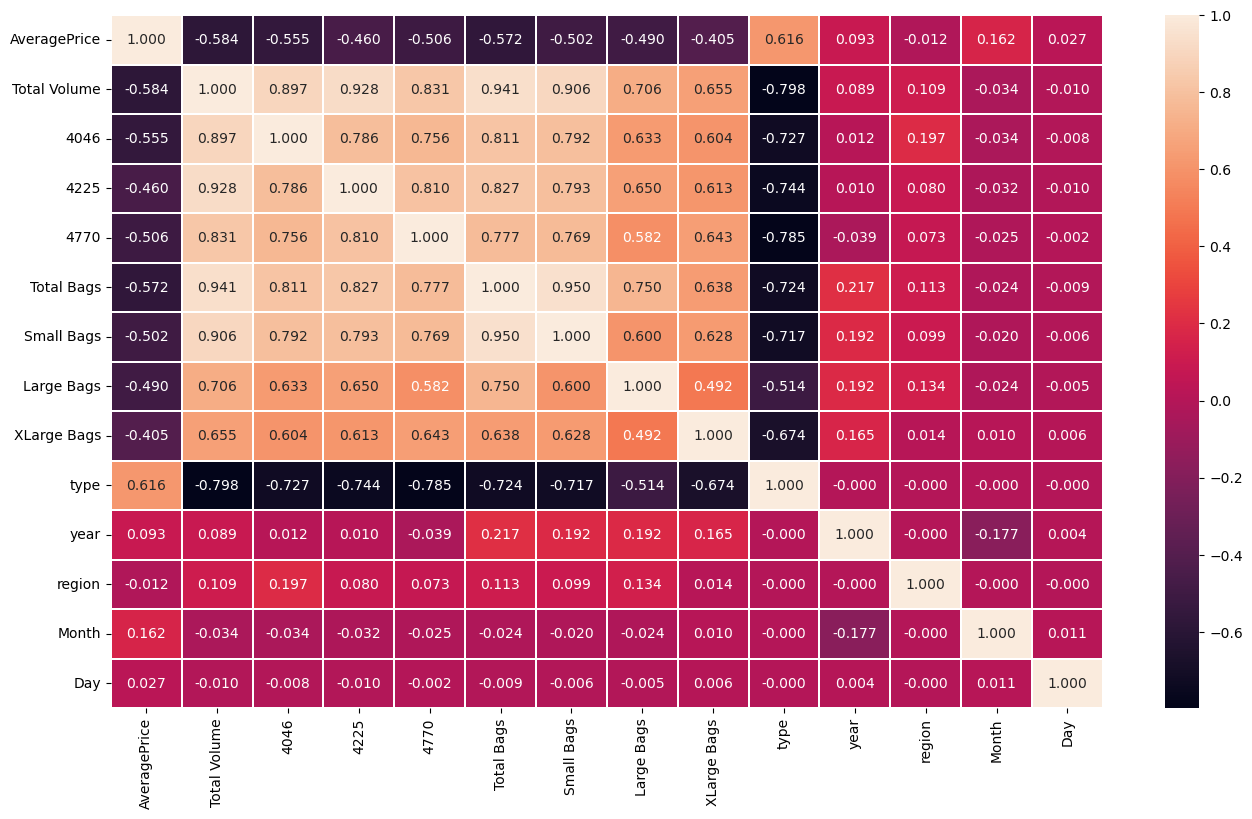

In [49]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0);

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target.

The features Day and region have no relation with the target so we can drop these columns.

Almost all the features are correlated with each other which leads to multicollinearity problem.

We will solve this problem by VIF value.

Also most of the columns have no relation with each other and have zero correlation

## Visualizing the correlation between label and features using bar plot

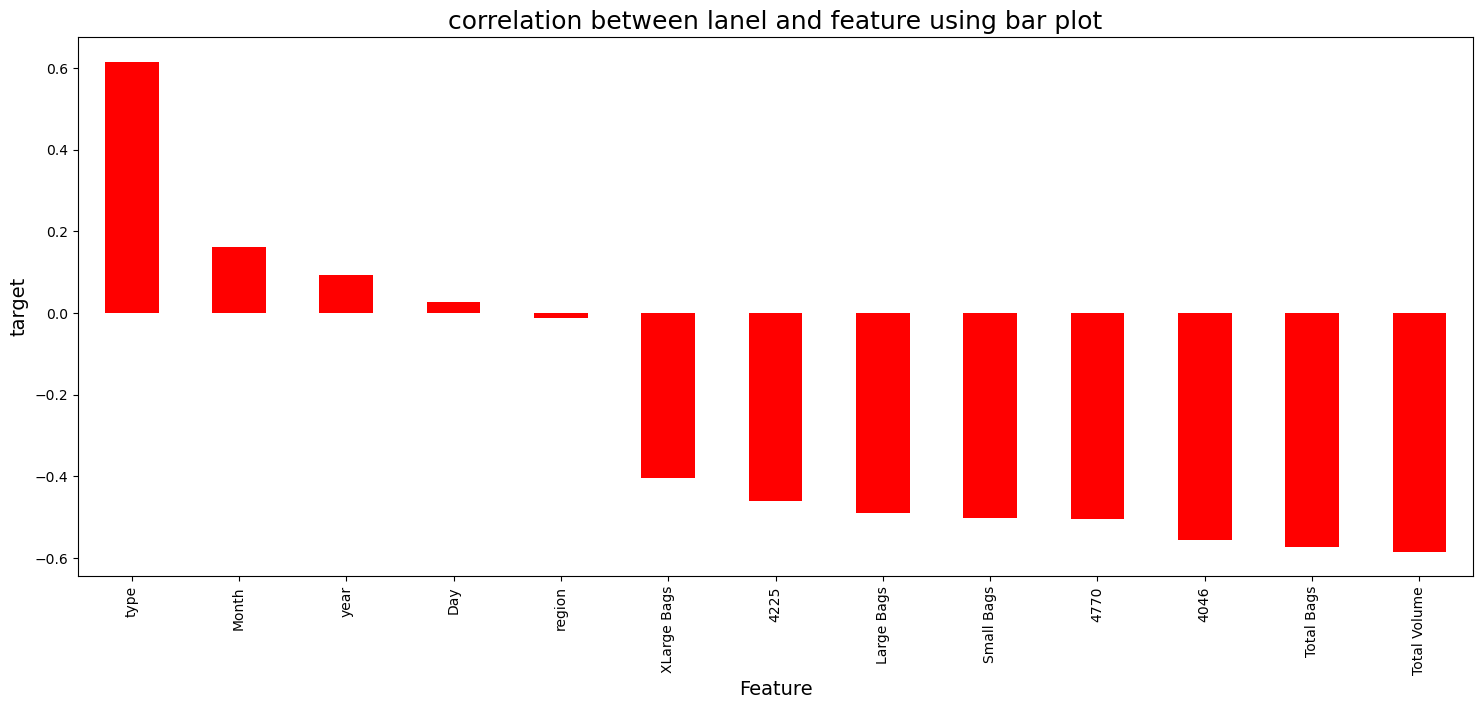

In [50]:
plt.figure(figsize=(18,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

The features region and Day have very less correlation with the target so we can drop these columns

In [51]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,2015,0,12,27
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,2015,0,12,20
2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,2015,0,12,13
3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0,2015,0,12,6
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0,2015,0,11,29


In [52]:
# Dropping irrelevant columns
df.drop("region",axis=1, inplace=True)
df.drop("XLarge Bags",axis=1, inplace=True)

In [53]:
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
18167,1.72,-1.252175,-0.987585,-0.861556,-1.23831,-1.024836,-1.08777,-0.067439,1,2018,3,11


## Separating the features and label variables into x and y

In [54]:
x = df.drop("AveragePrice", axis=1)
y = df["AveragePrice"]

## Standard Scalarization Method

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.999836,-1.221282,1.647632,1.291857
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.999836,-1.221282,1.647632,0.494231
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.999836,-1.221282,1.647632,-0.303396
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.999836,-1.221282,1.647632,-1.101022
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.999836,-1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,1.000164,1.970504,-1.181997,-1.328915
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,1.000164,1.970504,-1.464959,1.405803
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,1.000164,1.970504,-1.464959,0.608177
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,1.000164,1.970504,-1.464959,-0.189449


## Checking VIF values for multicollinearity

In [56]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,48.173025,Total Volume
1,6.809021,4046
2,10.822908,4225
3,4.197268,4770
4,32.146749,Total Bags
5,15.478359,Small Bags
6,3.458819,Large Bags
7,3.299390,type
8,1.326887,year
9,1.049196,Month


In [57]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [58]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,34.173473,Total Volume
1,6.125176,4046
2,9.705678,4225
3,4.191194,4770
4,7.323386,Small Bags
5,2.198365,Large Bags
6,3.266502,type
7,1.299809,year
8,1.047116,Month
9,1.000601,Day


Now VIF is less than 10 , so we move further

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)


In [60]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (14599, 10)
y_train shape: (14599,)
x_test shape: (3650, 10)
y_test.shape: (3650,)


## LinearRegression

In [61]:
LR= LinearRegression()
LR.fit(x_train, y_train)
pred_LR=LR.predict(x_test)

r2 = LR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_LR)
mse = mean_squared_error(y_test, pred_LR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_LR)
msle = mean_squared_log_error(y_test, pred_LR)
evs = explained_variance_score(y_test, pred_LR)
median_err = median_absolute_error(y_test, pred_LR)
max_err = max_error(y_test, pred_LR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)


R-squared: 0.5513557040002773
Mean Absolute Error: 0.20814756905687082
Mean Squared Error: 0.07296664523386016
Root Mean Squared Error: 0.27012338890562615
Mean Absolute Percentage Error: 0.15759272257759463
Mean Squared Logarithmic Error: 0.011992772713662786
Explained Variance Score: 0.5568301300662659
Median Absolute Error: 0.17337556680148014
Max Error: 1.2977055865364555


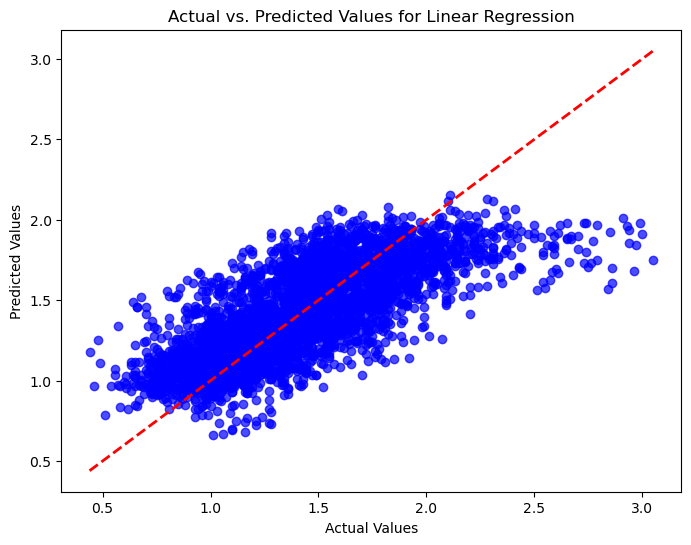

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_LR, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.show()


##  KNeighborsRegressor

In [63]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)

r2 = KNN.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_KNN)
mse = mean_squared_error(y_test, pred_KNN)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_KNN)
msle = mean_squared_log_error(y_test, pred_KNN)
evs = explained_variance_score(y_test, pred_KNN)
median_err = median_absolute_error(y_test, pred_KNN)
max_err = max_error(y_test, pred_KNN)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)


R-squared: 0.8929937091243303
Mean Absolute Error: 0.13394794520547945
Mean Squared Error: 0.03577688584474885
Root Mean Squared Error: 0.1891477883686427
Mean Absolute Percentage Error: 0.09844871732377834
Mean Squared Logarithmic Error: 0.005678759322802605
Explained Variance Score: 0.7827931706972138
Median Absolute Error: 0.09333333333333327
Max Error: 1.0633333333333332


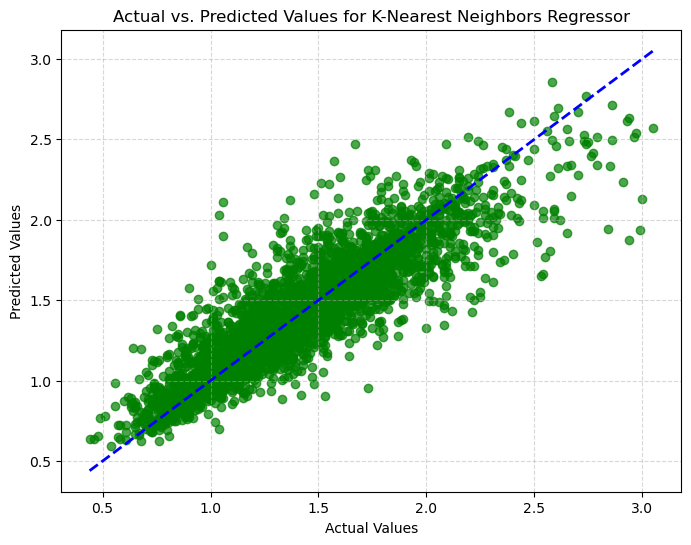

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_KNN, color='green', marker='o', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for K-Nearest Neighbors Regressor')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## DecisionTreeRegressor

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dtr = DecisionTreeRegressor()

grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

pred_DTR_tuned = best_estimator.predict(x_test)


Best Hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [66]:
DTR = DecisionTreeRegressor(max_depth=30,max_features="log2")
DTR.fit(x_train,y_train)
pred_DTR = DTR.predict(x_test)

r2 = DTR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_DTR)
mse = mean_squared_error(y_test, pred_DTR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_DTR)
msle = mean_squared_log_error(y_test, pred_DTR)
evs = explained_variance_score(y_test, pred_DTR)
median_err = median_absolute_error(y_test, pred_DTR)
max_err = max_error(y_test, pred_DTR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)


R-squared: 1.0
Mean Absolute Error: 0.1500712328767123
Mean Squared Error: 0.05537402739726028
Root Mean Squared Error: 0.23531686594305196
Mean Absolute Percentage Error: 0.1080648679799762
Mean Squared Logarithmic Error: 0.008668374121196446
Explained Variance Score: 0.6637134868661266
Median Absolute Error: 0.08999999999999997
Max Error: 1.75


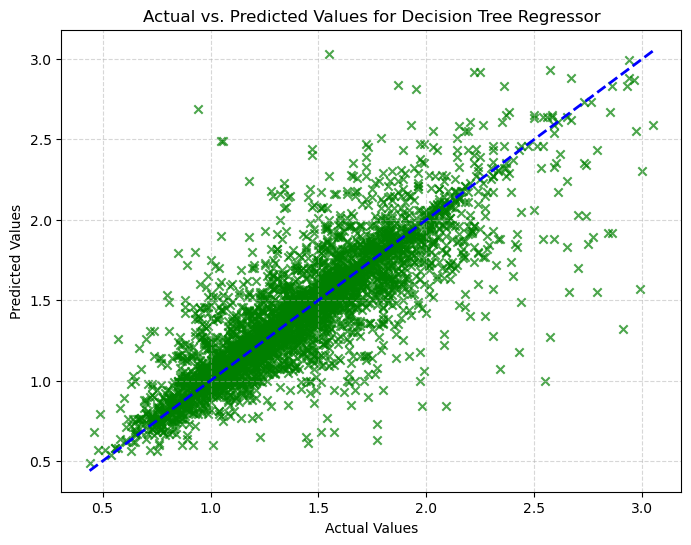

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_DTR, color='green', marker='x', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Decision Tree Regressor')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## Ridge

In [68]:
RR = Ridge()
RR.fit(x_train,y_train)
pred_RR = RR.predict(x_test)


r2 = RR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_RR)
mse = mean_squared_error(y_test, pred_RR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_RR)
msle = mean_squared_log_error(y_test, pred_RR)
evs = explained_variance_score(y_test, pred_RR)
median_err = median_absolute_error(y_test, pred_RR)
max_err = max_error(y_test, pred_RR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.5513553410466733
Mean Absolute Error: 0.2081475983606665
Mean Squared Error: 0.07296807955294261
Root Mean Squared Error: 0.27012604382573446
Mean Absolute Percentage Error: 0.15759691350695104
Mean Squared Logarithmic Error: 0.011993012645169386
Explained Variance Score: 0.5568215211091254
Median Absolute Error: 0.17342668416086837
Max Error: 1.2980968985347046


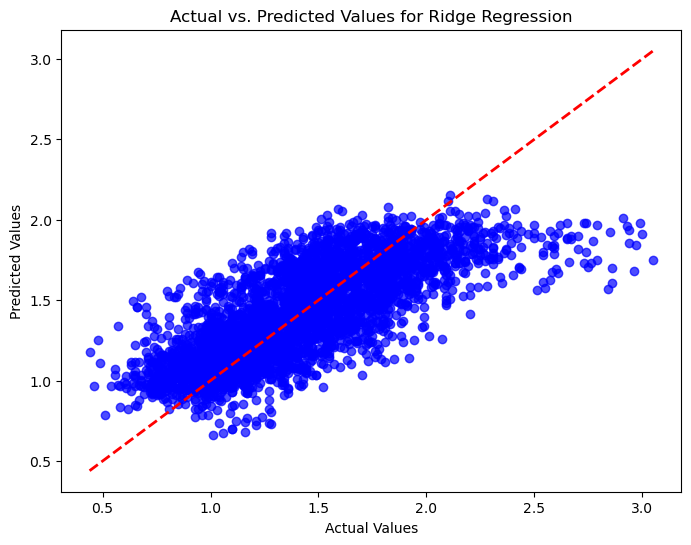

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_RR, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Ridge Regression')
plt.show()


## AdaBoostRegressor

In [70]:
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
pred_abr = abr.predict(x_test)

r2 = abr.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_abr)
mse = mean_squared_error(y_test, pred_abr)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_abr)
msle = mean_squared_log_error(y_test, pred_abr)
evs = explained_variance_score(y_test, pred_abr)
median_err = median_absolute_error(y_test, pred_abr)
max_err = max_error(y_test, pred_abr)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.5737187814295218
Mean Absolute Error: 0.21202693788429655
Mean Squared Error: 0.06790952453666867
Root Mean Squared Error: 0.26059455968356027
Mean Absolute Percentage Error: 0.16874102097051333
Mean Squared Logarithmic Error: 0.011731392141283891
Explained Variance Score: 0.6201150826850336
Median Absolute Error: 0.1886743015873691
Max Error: 0.9591691919191612


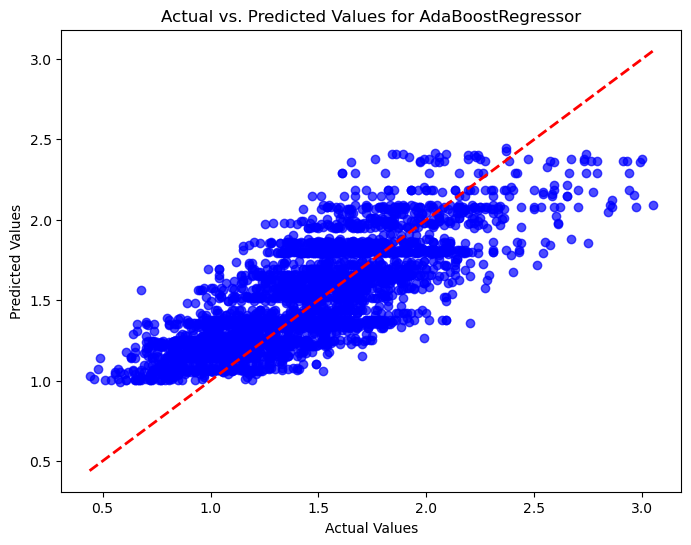

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_abr, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for AdaBoostRegressor')
plt.show()


In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dtr = DecisionTreeRegressor()

grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

pred_DTR_tuned = best_estimator.predict(x_test)


Best Hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}


## DecisionTreeRegressor gives best accuracy

In [73]:
# Save the model as a objectfile
import joblib

joblib.dump(DTR,'Avocado_Project_Regressor')

['Avocado_Project_Regressor']

## Task- Classification

In [74]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [75]:
df_c=pd.read_csv("C:/Users/KHUSHBOO RANI/OneDrive/Desktop/Projects/ML project/avocado.csv")
df_c.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
6915,27,2017-06-25,1.43,539847.30,349940.70,66569.13,127.88,123209.59,51069.12,59391.58,12748.89,conventional,2017,MiamiFtLauderdale
9430,44,2015-02-22,1.53,5821.39,32.64,92.08,0.00,5696.67,5696.67,0.00,0.00,organic,2015,BuffaloRochester
3638,50,2016-01-10,1.06,3310201.06,503914.83,1753942.06,352247.15,700097.02,488806.30,185907.38,25383.34,conventional,2016,GreatLakes
3003,39,2016-03-27,0.81,101267.73,40228.96,6891.08,9114.47,45033.22,44763.68,242.28,27.26,conventional,2016,Boise
8286,20,2017-08-13,1.49,367628.08,241771.30,49334.31,107.12,76415.35,14979.73,53594.51,7841.11,conventional,2017,Tampa


In [76]:
# List of values in the target column
df_c['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [77]:
# Checking the uniqueness of the target variable
df_c['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [78]:
#Label encoding the target column
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df_c['region'] = lbl.fit_transform(df_c['region'])

In [79]:
df_c['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

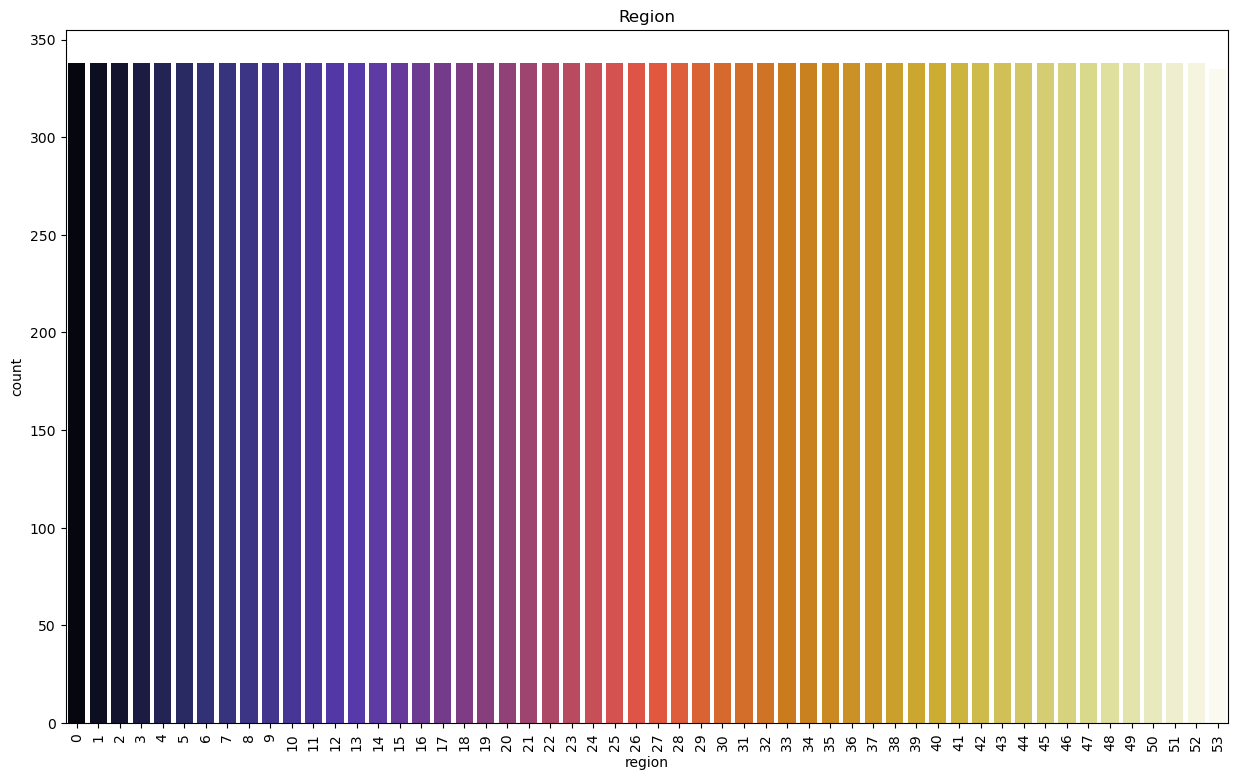

In [80]:
plt.figure(figsize=(15, 9))
sns.countplot(data=df_c, x='region', palette="CMRmap")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()


Here we can see the total number of regions are 53 and each of them having almost the same number os avacado count.

In [81]:
df_c.sample()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8451,26,2017-07-02,0.86,1023584.42,541032.2,87497.9,10276.33,384777.99,168553.29,216224.7,0.0,conventional,2017,53


In [82]:
# Dropping the unnamed column
df_c.drop("Unnamed: 0",axis=1,inplace=True)

In [83]:
# Dropping the year column
df_c.drop("year",axis=1,inplace=True)

### Changing date column from object type to Date type


In [84]:
df_c['Date'] = pd.to_datetime(df_c['Date'])


In [85]:
df_c['Month'] = df_c['Date'].dt.month

In [86]:
df_c['Day'] = df_c['Date'].dt.day


In [87]:
# Dropping the Date column
df_c.drop("Date",axis=1,inplace=True)

In [88]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,0,2015,12,27
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,0,2015,12,20
2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,0,2015,12,13
3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,0,2015,12,6
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,0,2015,11,29


In [89]:
df_c.sample(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
12734,1.66,116608.12,5611.64,67958.96,25.44,43012.08,20164.41,22847.67,0.00,organic,15,7,31
12996,2.11,3794.69,2538.40,191.36,41.60,1023.33,1023.33,0.00,0.00,organic,20,7,17
2844,1.22,86433.63,898.63,70042.60,25.00,15467.40,14642.65,712.25,112.50,conventional,0,4,17
806,1.07,3336314.35,476721.82,1631460.30,261863.52,966268.71,803974.11,148652.02,13642.58,conventional,15,6,28
7002,1.02,229240.49,144908.02,8243.13,354.53,75734.81,63826.67,11123.57,784.57,conventional,26,11,5
9003,1.31,600669.78,125236.30,202783.51,754.76,271895.21,138209.77,133100.87,584.57,conventional,43,1,21
6210,1.28,884631.40,480909.50,174844.63,1813.42,227063.85,147724.58,79245.31,93.96,conventional,11,10,15
12396,1.61,28813.36,814.10,27719.26,0.00,280.00,280.00,0.00,0.00,organic,8,1,31
15319,1.49,6971.41,801.47,3370.23,0.00,2799.71,2039.28,760.43,0.00,organic,10,1,29
14671,1.01,509484.65,163000.70,151262.14,9538.16,185683.65,55292.78,130390.87,0.00,organic,52,5,1


In [90]:
# LabelEncoding the type column
df_c['type']= lbl.fit_transform(df_c['type'])

## Seprating features and label

In [91]:
x = df_c.drop(['region'], axis =1)
y = df_c['region']

## Standard Scalarization

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.18868864, -0.22771641, -0.23081597, ..., -0.99983562,
         1.64763162,  1.29185687],
       [-0.13901962, -0.23042664, -0.23110251, ..., -0.99983562,
         1.64763162,  0.49423066],
       [-1.18206895, -0.21208462, -0.23100731, ..., -0.99983562,
         1.64763162, -0.30339555],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ...,  1.00016441,
        -1.46495942,  0.60817726],
       [ 1.30138182, -0.24162464, -0.2304279 , ...,  1.00016441,
        -1.46495942, -0.18944895],
       [ 0.53151208, -0.24125273, -0.22934712, ...,  1.00016441,
        -1.46495942, -0.98707516]])

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [94]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (12774, 12)
y_train shape: (12774,)
x_test shape: (5475, 12)
y_test.shape: (5475,)


## Checking accuracy for RandomForestClassifier


In [95]:
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'}
Test Accuracy: 0.8893150684931507


In [96]:
RFC = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth= 20)
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predRFC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predRFC))
print("")
print("Classification Report:\n", classification_report(y_test, predRFC))


Accuracy: 0.8898630136986302

Confusion Matrix:
 [[86  0  0 ...  0  0  0]
 [ 0 86  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 99  0  0]
 [ 0  0  0 ...  0 90  0]
 [ 0  0  0 ...  0  0 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87        96
           1       0.83      0.83      0.83       103
           2       0.95      0.97      0.96        95
           3       0.89      0.82      0.85        98
           4       0.89      0.95      0.92       104
           5       0.83      0.83      0.83       109
           6       0.98      0.99      0.98        99
           7       0.93      0.86      0.89       113
           8       0.98      0.97      0.98       105
           9       0.91      0.88      0.89       109
          10       0.82      0.86      0.84       104
          11       0.95      0.93      0.94       103
          12       0.93      0.96      0.94        96
          13 

## K Neighbors Classification

In [97]:
knn=KNeighborsClassifier(metric_params=None)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_knn))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_knn))
print("")
print("Classification Report:\n", classification_report(y_test, pred_knn))

Accuracy: 0.15178082191780823

Confusion Matrix:
 [[10  2  5 ...  0  0  0]
 [ 8 10  6 ...  0  1  1]
 [ 3  3 19 ...  0  0  0]
 ...
 [ 0  0  1 ... 88  2  0]
 [ 1  5  3 ...  0 53  0]
 [ 5 12  4 ...  0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.10      0.03        96
           1       0.03      0.10      0.04       103
           2       0.06      0.20      0.10        95
           3       0.02      0.06      0.02        98
           4       0.02      0.04      0.02       104
           5       0.01      0.02      0.01       109
           6       0.29      0.46      0.36        99
           7       0.03      0.05      0.04       113
           8       0.28      0.47      0.35       105
           9       0.06      0.14      0.08       109
          10       0.02      0.04      0.02       104
          11       0.12      0.21      0.15       103
          12       0.25      0.28      0.27        96
          13

## Support vector classifier

In [98]:
svc_rbf=SVC(kernel='rbf',gamma='auto',C=22)
svc_rbf.fit(x_train,y_train)
predsvc_rbf=svc_rbf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predsvc_rbf))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predsvc_rbf))
print("")
print("Classification Report:\n", classification_report(y_test, predsvc_rbf))

Accuracy: 0.4001826484018265

Confusion Matrix:
 [[14  0  0 ...  0  0  0]
 [ 5 33  0 ...  0  0  0]
 [ 3  0 49 ...  0  0  0]
 ...
 [ 0  0  0 ... 99  0  0]
 [ 0  0  0 ...  1 82  0]
 [ 4  1  2 ...  0  0 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.15      0.07        96
           1       0.49      0.32      0.39       103
           2       0.66      0.52      0.58        95
           3       0.56      0.39      0.46        98
           4       0.80      0.39      0.53       104
           5       0.35      0.24      0.28       109
           6       0.86      0.65      0.74        99
           7       0.56      0.21      0.31       113
           8       0.86      0.52      0.65       105
           9       0.72      0.42      0.53       109
          10       0.71      0.14      0.24       104
          11       0.25      0.43      0.31       103
          12       0.59      0.49      0.54        96
          13 

## DecisionTreeClassifier

In [99]:
param_combinations = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    dt_classifier.fit(x_train, y_train)
    y_pred = dt_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.7789954337899543


In [100]:
dtc=DecisionTreeClassifier(criterion='entropy',min_samples_split=2,min_samples_leaf=1)
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_dtc))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_dtc))
print("")
print("Classification Report:\n", classification_report(y_test, pred_dtc))


Accuracy: 0.7764383561643836

Confusion Matrix:
 [[77  0  0 ...  0  0  0]
 [ 0 78  0 ...  0  0  2]
 [ 0  0 86 ...  0  0  0]
 ...
 [ 0  0  0 ... 99  0  0]
 [ 0  0  0 ...  0 86  0]
 [ 0  0  2 ...  0  0 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        96
           1       0.70      0.76      0.73       103
           2       0.86      0.91      0.88        95
           3       0.83      0.76      0.79        98
           4       0.75      0.81      0.78       104
           5       0.62      0.72      0.67       109
           6       0.96      0.90      0.93        99
           7       0.82      0.78      0.80       113
           8       0.92      0.90      0.91       105
           9       0.74      0.79      0.76       109
          10       0.65      0.59      0.62       104
          11       0.86      0.87      0.87       103
          12       0.81      0.78      0.79        96
          13 

## ExtraTreesClassifier


In [101]:
param_combinations = [
    {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    et_classifier = ExtraTreesClassifier(**params, random_state=42)
    et_classifier.fit(x_train, y_train)
    y_pred = et_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.8889497716894977


In [102]:
EXC=ExtraTreesClassifier(n_estimators=100,criterion='gini')
EXC.fit(x_train,y_train)
pred_EXC=RFC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_EXC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_EXC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_EXC))

Accuracy: 0.8898630136986302

Confusion Matrix:
 [[86  0  0 ...  0  0  0]
 [ 0 86  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 99  0  0]
 [ 0  0  0 ...  0 90  0]
 [ 0  0  0 ...  0  0 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87        96
           1       0.83      0.83      0.83       103
           2       0.95      0.97      0.96        95
           3       0.89      0.82      0.85        98
           4       0.89      0.95      0.92       104
           5       0.83      0.83      0.83       109
           6       0.98      0.99      0.98        99
           7       0.93      0.86      0.89       113
           8       0.98      0.97      0.98       105
           9       0.91      0.88      0.89       109
          10       0.82      0.86      0.84       104
          11       0.95      0.93      0.94       103
          12       0.93      0.96      0.94        96
          13 

## AdaBoostClassifier

In [105]:
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 150, 'learning_rate': 0.1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    ada_classifier = AdaBoostClassifier(**params, random_state=42)
    ada_classifier.fit(x_train, y_train)
    y_pred = ada_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 150, 'learning_rate': 0.1}
Test Accuracy: 0.15799086757990868


In [106]:
ABC=AdaBoostClassifier(n_estimators=150,learning_rate=.1)
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_ABC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_ABC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_ABC))

Accuracy: 0.14319634703196346

Confusion Matrix:
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  2]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 39  0]
 [ 0  0  3 ...  0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.00      0.00      0.00       103
           2       0.22      0.26      0.24        95
           3       0.00      0.00      0.00        98
           4       0.16      0.15      0.16       104
           5       0.00      0.00      0.00       109
           6       0.50      0.03      0.06        99
           7       0.08      0.43      0.13       113
           8       1.00      0.01      0.02       105
           9       0.00      0.00      0.00       109
          10       0.20      0.29      0.24       104
          11       0.30      0.57      0.39       103
          12       0.15      0.24      0.18        96
          13

## BaggingClassifier

In [107]:
param_combinations = [
    {'n_estimators': 10, 'max_samples': 1.0, 'max_features': 1.0},
    {'n_estimators': 50, 'max_samples': 0.8, 'max_features': 0.8},
    {'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.5},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    bagging_classifier = BaggingClassifier(**params, random_state=42)
    bagging_classifier.fit(x_train, y_train)
    y_pred = bagging_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 50, 'max_samples': 0.8, 'max_features': 0.8}
Test Accuracy: 0.8803652968036529


In [109]:
BC=BaggingClassifier(n_estimators=50,max_samples=0.8,max_features=0.8)
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_BC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_BC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_BC))

Accuracy: 0.8767123287671232

Confusion Matrix:
 [[86  0  0 ...  0  0  0]
 [ 0 85  0 ...  0  0  0]
 [ 0  0 93 ...  0  0  0]
 ...
 [ 0  0  0 ... 99  0  0]
 [ 0  0  0 ...  0 89  0]
 [ 0  0  1 ...  0  0 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        96
           1       0.79      0.83      0.81       103
           2       0.93      0.98      0.95        95
           3       0.82      0.82      0.82        98
           4       0.87      0.94      0.90       104
           5       0.83      0.81      0.82       109
           6       0.99      0.98      0.98        99
           7       0.94      0.85      0.89       113
           8       0.97      0.98      0.98       105
           9       0.92      0.90      0.91       109
          10       0.77      0.79      0.78       104
          11       0.97      0.94      0.96       103
          12       0.93      0.95      0.94        96
          13 

## RandomForestClassifier gives better accuracy

## Cross Validation Score

In [110]:
# Checking cv score for Random Forest Classifier
score = cross_val_score(RFC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, predRFC) - score.mean())

[0.62712329 0.82082192 0.73726027 0.66931507 0.48670869]
0.6682458470513596
0.2216171666472706


In [111]:
import joblib
# Save the model as a objectfile

joblib.dump(RFC,'Avocado_Project_Classification')

['Avocado_Project_Classification']